# Importing the required libraries

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import pickle
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Setting the directory
print("Current working directory:", os.getcwd())
os.chdir("C:/Users/vinotsek/Desktop/LCS - Bulletin")
print("New working directory:", os.getcwd())

# Data Manipulation for the model

In [16]:
LCS = pd.read_excel("LCS - Bulletin.xlsx",sheet_name="Attritioned_Customers")
LCS=LCS.iloc[:,[0,10,11,12,13,14,15]]
LCS.set_index('CAV End Customer BU Name', inplace=True)
LCS = pd.get_dummies(LCS, columns=['Propensity Bracket','Reason buckets'])
#Dropping N/A's from the variables
LCS = LCS.select_dtypes(include=['number']).dropna()

#Standardize numerical variable
scaler = StandardScaler()
LCS_scaled = LCS.copy()
LCS_scaled[LCS_scaled.columns] = scaler.fit_transform(LCS_scaled[LCS_scaled.columns])

# Determining number of clusters using elbow method

C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

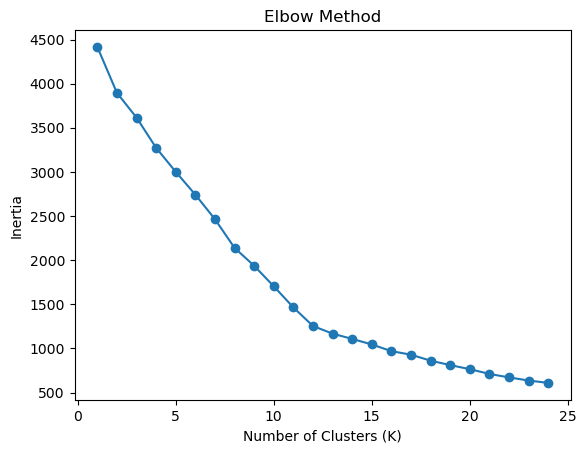

In [18]:

inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(LCS_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 25), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Merging the cluster numbers to the original data set

In [19]:
optimal_k = 12  # Change this based on your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
LCS_scaled['Cluster'] = kmeans.fit_predict(LCS_scaled)
LCS = LCS .merge(LCS_scaled[['Cluster']], left_index=True, right_index=True, how='left')
# cluster_centers = pd.DataFrame(kmeans.cluster_centers_, LCS_scaled.columns[:-1])
# print("Cluster Centers:")
# print(cluster_centers)

# # Explore each cluster
# for cluster_num in range(optimal_k):
#     cluster_data = LCS_scaled[LCS_scaled['Cluster'] == cluster_num]
#     print(f"\nCluster {cluster_num} Size: {len(cluster_data)}")
#     print(cluster_data.describe())
#LCS.to_excel("Model_output.xlsx")

C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vinotsek\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# Example for 2D visualization 

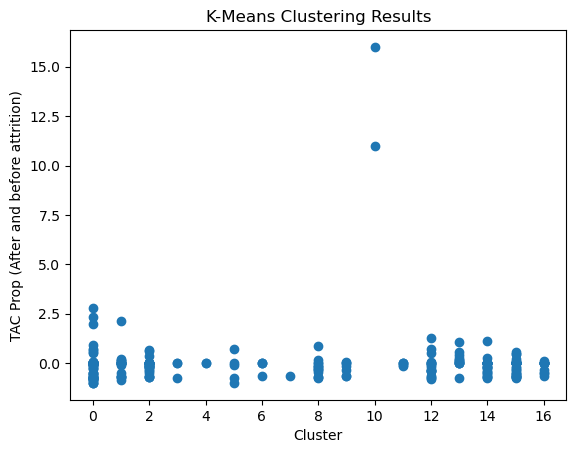

In [14]:
plt.scatter(LCS['Cluster'],LCS['TAC Prop (After and before attrition)'])
plt.title('K-Means Clustering Results')
plt.xlabel('Cluster')
plt.ylabel('TAC Prop (After and before attrition)')
plt.show()